In [1]:
import tensorflow as tf


'2.0.0'

In [5]:
mnist=tf.keras.datasets.mnist     #28x28 handwritten images of 0-9


In [6]:
(X_train,Y_train),(X_test,Y_Test)=mnist.load_data()

11493376/11490434 [==============================] - 219s 19us/step


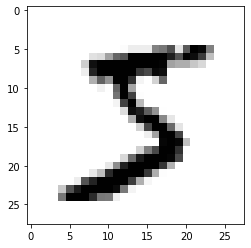

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap=plt.cm.binary)       #converting it into greyscale image
plt.show()

In [12]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
X_train=tf.keras.utils.normalize(X_train,axis=1)       #Scaling the image between 0 to 1 usually it varies btw 0-255
X_test=tf.keras.utils.normalize(X_test,axis=1)     

In [13]:
model = tf.keras.models.Sequential()                                #model building
model.add(tf.keras.layers.Flatten())                                #Entry/Input Level flattening
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))         #1st dense layer with 128 neural networks/units
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))         #2nd dense layer with 128 neural networks/units
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))  #O/p layer and softmax cause we want probability Dist.  

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,Y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2613 - accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1083 - accuracy: 0.9662
Epoch 3/3
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0748 - accuracy: 0.9762


In [17]:
val_loss,val_acc=model.evaluate(X_test,Y_Test)
print(val_loss,val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09232504891417921 0.9718


In [18]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [19]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [20]:
predictions=new_model.predict([X_test])

In [21]:
print (predictions)                     #its gonna give probabilites inorder to extract the result we can use numpy

[[2.3233577e-09 5.2785364e-08 5.6793198e-07 ... 9.9999475e-01
  1.2280341e-07 1.5741720e-07]
 [2.2269580e-08 1.2399725e-04 9.9987078e-01 ... 6.4079986e-10
  4.1568626e-07 1.2289507e-10]
 [4.2672184e-08 9.9992406e-01 3.6585777e-06 ... 1.1858394e-05
  5.2488460e-05 3.9819029e-06]
 ...
 [2.2231957e-08 8.2401777e-07 2.5878116e-08 ... 1.8220271e-05
  4.9800383e-06 6.5515551e-04]
 [2.8211650e-07 6.9481835e-08 7.6734941e-10 ... 2.0748452e-07
  1.4947407e-04 9.0594741e-09]
 [1.2259032e-05 6.5218245e-07 5.3490556e-08 ... 1.5481229e-10
  1.4155717e-06 1.1491132e-08]]


In [28]:
import numpy as np
np.argmax(predictions[0])

7

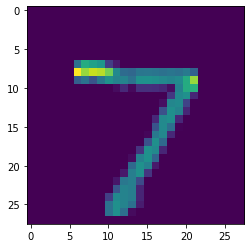

In [29]:
plt.imshow(X_test[0])                                 #Finally our model is predicting well, you can check others too!!
plt.show()